<a href="https://colab.research.google.com/github/sonateresa/feynnlabs-sona/blob/main/Sustainable_Palette_Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
food_production_df = pd.read_csv("/content/Food_Production.csv")
nutritional_info_df = pd.read_csv("/content/NUTRITIONAL INFO.csv")

In [ ]:
print("Food Production Dataset - Missing Values:")
print(food_production_df.isnull().sum())
print("\nNutritional Info Dataset - Missing Values:")
print(nutritional_info_df.isnull().sum())

Food Production Dataset - Missing Values:
Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals

In [ ]:
food_production_df.fillna(0, inplace=True)

In [ ]:
print("Food Production Dataset - Missing Values:")
print(food_production_df.isnull().sum())

Food Production Dataset - Missing Values:
Food product                                                               0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   0
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   0
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      0
Freshwater withdrawals per 1000kca

In [ ]:
food_production_df.columns = food_production_df.columns.str.lower()
nutritional_info_df.columns = nutritional_info_df.columns.str.lower()

In [ ]:
print("\nFood Production dataset:")
food_production_df.head()


Food Production dataset:


,food product,land use change,animal feed,farm,processing,transport,packging,retail,total_emissions,eutrophying emissions per 1000kcal (gpo₄eq per 1000kcal),...,freshwater withdrawals per 100g protein (liters per 100g protein),freshwater withdrawals per kilogram (liters per kilogram),greenhouse gas emissions per 1000kcal (kgco₂eq per 1000kcal),greenhouse gas emissions per 100g protein (kgco₂eq per 100g protein),land use per 1000kcal (m² per 1000kcal),land use per kilogram (m² per kilogram),land use per 100g protein (m² per 100g protein),scarcity-weighted water use per kilogram (liters per kilogram),scarcity-weighted water use per 100g protein (liters per 100g protein),scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [ ]:
print("\nNutritional Info dataset:")
nutritional_info_df.head()


Nutritional Info dataset:


,food product,energy value(kcal),protein(g),carbohydrate(g),total sugars(g),added sugars(g),total fat(g),saturated fat(g),trans fat(g),cholesterol(mg),sodium(mg)
0,Britannia 50-50 Biscuits,487.0,7.0,72.0,19.5,18.5,19.0,9,0,0.0,466.0
1,Parle Monaco Biscuits,492.0,7.9,68.8,8.4,7.8,20.6,9.7,0,0.0,891.0
2,Parle-G Biscuits,454.0,6.9,77.3,25.5,25.0,13.0,6,0,0.0,296.0
3,Britannia Bourbon Biscuits,493.0,5.1,72.6,38.0,35.1,20.3,10,0,0.0,108.0
4,Britannia Marie GOLD,445.0,8.4,78.9,21.9,20.0,10.7,5.2,0,0.0,0.0


In [ ]:
#Step 2: Feature Engineering

In [ ]:
#Calculate energy value per kilogram for nutritional info dataset
nutritional_info_df['energy_per_kg'] = nutritional_info_df['energy value(kcal)'] / 900  # Assuming 1 kilogram = 900 grams

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
print(nutritional_info_df.dtypes)

food product           object
energy value(kcal)    float64
protein(g)            float64
carbohydrate(g)       float64
total sugars(g)       float64
added sugars(g)       float64
total fat(g)          float64
saturated fat(g)       object
trans fat(g)           object
cholesterol(mg)       float64
sodium(mg)            float64
energy_per_kg         float64
dtype: object


In [ ]:
print(nutritional_info_df['total fat(g)'].unique())
print(nutritional_info_df['saturated fat(g)'].unique())
print(nutritional_info_df['trans fat(g)'].unique())

[ 19.    20.6   13.    20.3   10.7   21.    14.    23.4  100.    99.99
  19.6   20.1   13.5    1.3   24.2   25.1   11.6    0.     1.5   12.8
   8.3   99.7   33.4   32.2   34.6   34.7   38.21  20.93  38.12   2.9
  31.8   21.4   17.     3.     5.3    1.     8.1    0.47]
['9' '9.7' '6' '10' '5.2' '10.2' '11.5' '23' '17' 'Less than15%'
 'Not more than 45.45' '10.7' '8.2' '0.3' '11.3' '22.6' '5.8' '0' '0.2'
 '6.6' '3.9' '62' '14.2' '12.2' '15.6' '18.56' '5.64' '16.5' '13.2' '1.2'
 '14.3' '4' '3.3' '1.8' '1.6' '0.6' '0.1']
['0' '2' 'Less than 1%' '0.1' '0.13' '0.12' '0.2' '1.5' '0.15']


In [ ]:
nutritional_info_df['total fat(g)'] = nutritional_info_df['total fat(g)'].replace('Trace', 0)
nutritional_info_df['saturated fat(g)'] = nutritional_info_df['saturated fat(g)'].replace(['Less than15%', 'Not more than 45.45'], 0)
nutritional_info_df['trans fat(g)'] = nutritional_info_df['trans fat(g)'].replace('Less than 1%', 0)

In [ ]:
# Normalize numerical features in both datasets
food_production_df_normalized = food_production_df.copy()
food_production_df_normalized[['land use change', 'animal feed', 'farm', 'processing', 'transport', 'packging',
                               'retail', 'total_emissions']] = scaler.fit_transform(food_production_df[['land use change',
                                                                                                     'animal feed', 'farm',
                                                                                                     'processing',
                                                                                                     'transport', 'packging',
                                                                                                     'retail',
                                                                                                     'total_emissions']])

nutritional_info_df_normalized = nutritional_info_df.copy()
nutritional_info_df_normalized[['energy value(kcal)', 'protein(g)', 'carbohydrate(g)', 'total sugars(g)',
                                'added sugars(g)', 'total fat(g)', 'saturated fat(g)', 'trans fat(g)',
                                'cholesterol(mg)', 'sodium(mg)', 'energy_per_kg']] = scaler.fit_transform(
    nutritional_info_df[['energy value(kcal)', 'protein(g)', 'carbohydrate(g)', 'total sugars(g)', 'added sugars(g)',
                         'total fat(g)', 'saturated fat(g)', 'trans fat(g)', 'cholesterol(mg)', 'sodium(mg)',
                         'energy_per_kg']])

In [ ]:
# Display the first few rows of normalized datasets to verify changes
print("\nNormalized Food Production dataset:")
print(food_production_df_normalized.head())

print("\nNormalized Nutritional Info dataset:")
print(nutritional_info_df_normalized.head())



Normalized Food Production dataset:
          food product  land use change  animal feed      farm  processing  \
0  Wheat & Rye (Bread)         0.119565          0.0  0.017812    0.153846   
1         Maize (Meal)         0.130435          0.0  0.010178    0.076923   
2        Barley (Beer)         0.114130          0.0  0.002545    0.076923   
3              Oatmeal         0.114130          0.0  0.033079    0.000000   
4                 Rice         0.114130          0.0  0.089059    0.076923   

   transport  packging    retail  total_emissions  \
0      0.125    0.0625  0.333333         0.020202   
1      0.125    0.0625  0.000000         0.015152   
2      0.000    0.3125  1.000000         0.015152   
3      0.125    0.0625  0.000000         0.023569   
4      0.125    0.0625  0.333333         0.063973   

   eutrophying emissions per 1000kcal (gpo₄eq per 1000kcal)  ...  \
0                                           0.000000         ...   
1                                      

In [ ]:
#Step 3: Machine Learning Model Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Assuming 'total_emissions' from food_production_df as the target variable
X = nutritional_info_df[['energy value(kcal)', 'protein(g)', 'carbohydrate(g)', 'total sugars(g)',
                          'added sugars(g)', 'total fat(g)', 'saturated fat(g)', 'trans fat(g)',
                          'cholesterol(mg)', 'sodium(mg)']]
y = food_production_df['total_emissions']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initialize regression models
linear_reg_model = LinearRegression()
random_forest_reg_model = RandomForestRegressor()
gradient_boosting_reg_model = GradientBoostingRegressor()

In [ ]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
random_forest_reg_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
gradient_boosting_reg_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
linear_reg_predictions = linear_reg_model.predict(X_test)
random_forest_reg_predictions = random_forest_reg_model.predict(X_test)
gradient_boosting_reg_predictions = gradient_boosting_reg_model.predict(X_test)

In [ ]:
# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

rf_reg_mse = mean_squared_error(y_test, random_forest_reg_predictions)
rf_reg_r2 = r2_score(y_test, random_forest_reg_predictions)

gb_reg_mse = mean_squared_error(y_test, gradient_boosting_reg_predictions)
gb_reg_r2 = r2_score(y_test, gradient_boosting_reg_predictions)

print("Linear Regression - MSE:", linear_reg_mse, "R-squared:", linear_reg_r2)
print("Random Forest Regression - MSE:", rf_reg_mse, "R-squared:", rf_reg_r2)
print("Gradient Boosting Regression - MSE:", gb_reg_mse, "R-squared:", gb_reg_r2)


Linear Regression - MSE: 29.40853495674892 R-squared: 0.5185943713882497
Random Forest Regression - MSE: 44.01509733333328 R-squared: 0.2794909494361594
Gradient Boosting Regression - MSE: 62.012210998181914 R-squared: -0.015114403389663966


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
print(nutritional_info_df.columns)

Index(['food product', 'energy value(kcal)', 'protein(g)', 'carbohydrate(g)',
       'total sugars(g)', 'added sugars(g)', 'total fat(g)',
       'saturated fat(g)', 'trans fat(g)', 'cholesterol(mg)', 'sodium(mg)',
       'energy_per_kg'],
      dtype='object')


In [ ]:
X = nutritional_info_df.drop(columns=['food product'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determining the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

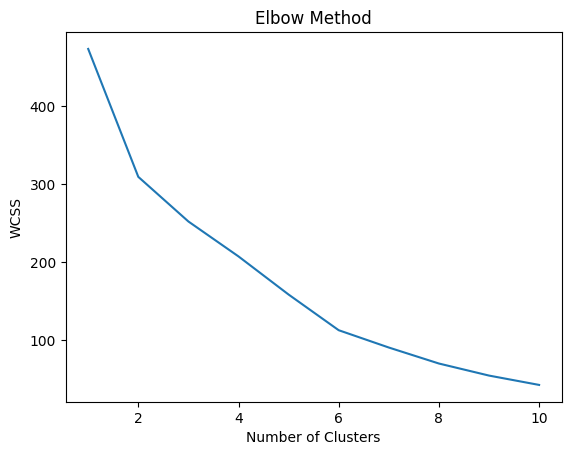

In [ ]:
# Plotting the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Based on the Elbow curve, choose 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
nutritional_info_df['Cluster'] = clusters

In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
   energy value(kcal)  protein(g)  carbohydrate(g)  total sugars(g)  \
0          389.376471    4.876471        65.105882        32.247059   
1          462.526316    9.371579        61.835263         3.898947   
2          897.000000    0.000000         0.000000         0.000000   
3          900.000000    0.000000         0.000000         0.000000   
4          245.000000    2.900000        15.150000         4.200000   

   added sugars(g)  total fat(g)  saturated fat(g)  trans fat(g)  \
0        22.094118     12.229412          6.505882      0.033529   
1         2.790526     18.780526          8.894737      0.043684   
2         0.000000     99.700000         62.000000      1.500000   
3         0.000000     99.997500         10.000000      1.000000   
4         0.000000     19.200000          3.650000      0.000000   

   cholesterol(mg)   sodium(mg)  energy_per_kg  
0     2.976471e+00   184.782353       0.432641  
1    -1.776357e-15   651.715789       0.513918  


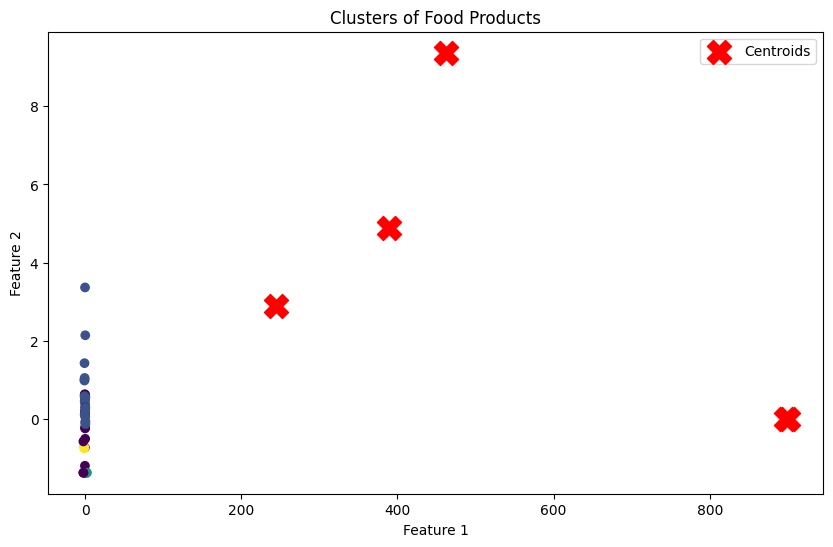

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters of Food Products')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

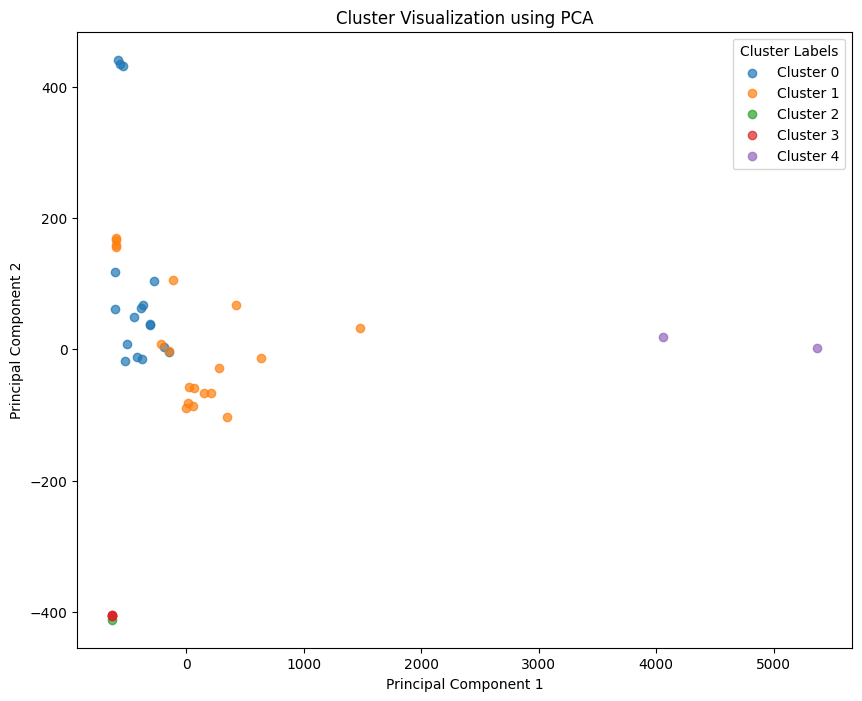

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(len(cluster_centers)):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}', alpha=0.7)

# Add legend with cluster labels
plt.legend(title='Cluster Labels')

plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


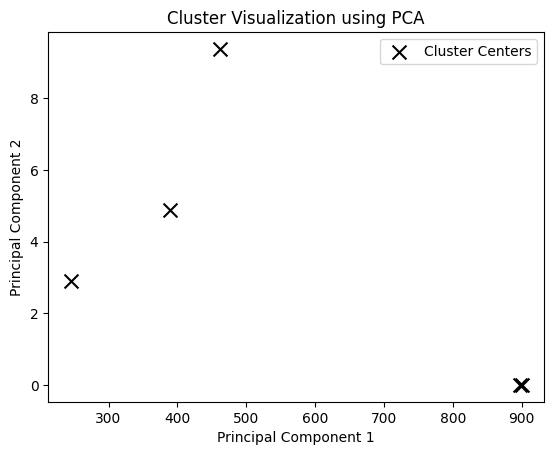

In [ ]:
# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
def assign_cluster_labels(data, kmeans_model):
    """Assign cluster labels to each data point"""
    cluster_labels = kmeans_model.predict(data)
    return cluster_labels

def recommend_products(product_name, cluster_labels, products_df):
    """Recommend other products from the same cluster as the given product"""
    product_cluster = cluster_labels[products_df.index[products_df['food product'] == product_name].tolist()[0]]
    recommended_products = products_df[cluster_labels == product_cluster]['food product']
    recommended_products = recommended_products[recommended_products != product_name]  # Exclude the given product
    return recommended_products

In [ ]:
# Example
product_name = 'Parle Monaco Biscuits'
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X)
cluster_labels = kmeans_model.predict(X)
recommended_products = recommend_products(product_name, cluster_labels, nutritional_info_df)
print(f"Recommended products for '{product_name}':")
print(recommended_products)

Recommended products for 'Parle Monaco Biscuits':
0     Britannia 50-50 Biscuits
5       Britannia Nutri Choice
11               OREO Biscuits
13              Yippee Noodles
14               Maggi Noodles
24          BINGO Potato Chips
25                 LAYS TOMATO
26              KURKURE TOMATO
27       KURKURE GREEN CHUTNEY
28        HALDIRAM SOYA STICKS
30        HALDIRAM ALOO BHUJIA
31            HALDIRAM MIXTURE
33            BINGO MAD ANGLES
38       KELLOGG'S CORN FLAKES
Name: food product, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
product_name = 'Parle-G Biscuits'
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X)
cluster_labels = kmeans_model.predict(X)
recommended_products = recommend_products(product_name, cluster_labels, nutritional_info_df)
print(f"Recommended products for '{product_name}':")
print(recommended_products)

Recommended products for 'Parle-G Biscuits':
3     Britannia Bourbon Biscuits
4           Britannia Marie GOLD
6           Britannia Milk Bikis
7            Britannia Good Day 
15               Aashirvaad ATTA
16          Sunfeast MOM'S MAGIC
17                PERK Chocolate
18              KOPIKO Chocolate
19          MANGO BITE Chocolate
20                Annapurna ATTA
21             Melody Chcocolate
22                BRITANNIA RUSK
29            HALDIRAM MOONG DAL
32                        CHOCOS
36      Visakha Dairy Ganga Milk
37                  Saffola Oats
40           Daawat Basmati Rice
41             Maaza Mango Drink
42        Real Fruit Apple Juice
Name: food product, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
product_name = 'Aashirvaad ATTA'
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X)
cluster_labels = kmeans_model.predict(X)
recommended_products = recommend_products(product_name, cluster_labels, nutritional_info_df)
print(f"Recommended products for '{product_name}':")
print(recommended_products)

Recommended products for 'Aashirvaad ATTA':
2               Parle-G Biscuits
3     Britannia Bourbon Biscuits
4           Britannia Marie GOLD
6           Britannia Milk Bikis
7            Britannia Good Day 
16          Sunfeast MOM'S MAGIC
17                PERK Chocolate
18              KOPIKO Chocolate
19          MANGO BITE Chocolate
20                Annapurna ATTA
21             Melody Chcocolate
22                BRITANNIA RUSK
29            HALDIRAM MOONG DAL
32                        CHOCOS
36      Visakha Dairy Ganga Milk
37                  Saffola Oats
40           Daawat Basmati Rice
41             Maaza Mango Drink
42        Real Fruit Apple Juice
Name: food product, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Fit the KMeans model
kmeans_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
# Assign cluster labels to each data point
cluster_labels = assign_cluster_labels(X_scaled, kmeans_model)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
# Add cluster labels to the nutritional_info_df
nutritional_info_df['Cluster'] = cluster_labels

In [ ]:
# Display the dataframe with cluster labels
print(nutritional_info_df.head())

                 food product  energy value(kcal)  protein(g)  \
0    Britannia 50-50 Biscuits               487.0         7.0   
1       Parle Monaco Biscuits               492.0         7.9   
2            Parle-G Biscuits               454.0         6.9   
3  Britannia Bourbon Biscuits               493.0         5.1   
4        Britannia Marie GOLD               445.0         8.4   

   carbohydrate(g)  total sugars(g)  added sugars(g)  total fat(g)  \
0             72.0             19.5             18.5          19.0   
1             68.8              8.4              7.8          20.6   
2             77.3             25.5             25.0          13.0   
3             72.6             38.0             35.1          20.3   
4             78.9             21.9             20.0          10.7   

  saturated fat(g) trans fat(g)  cholesterol(mg)  sodium(mg)  energy_per_kg  \
0                9            0              0.0       466.0       0.541111   
1              9.7            

In [ ]:
# Grouping by food type and summing up the total emissions
food_emissions = food_production_df.groupby('food product')['total_emissions'].sum()

# Sorting the emissions in descending order to find the most impactful food types
food_emissions_sorted = food_emissions.sort_values(ascending=False)

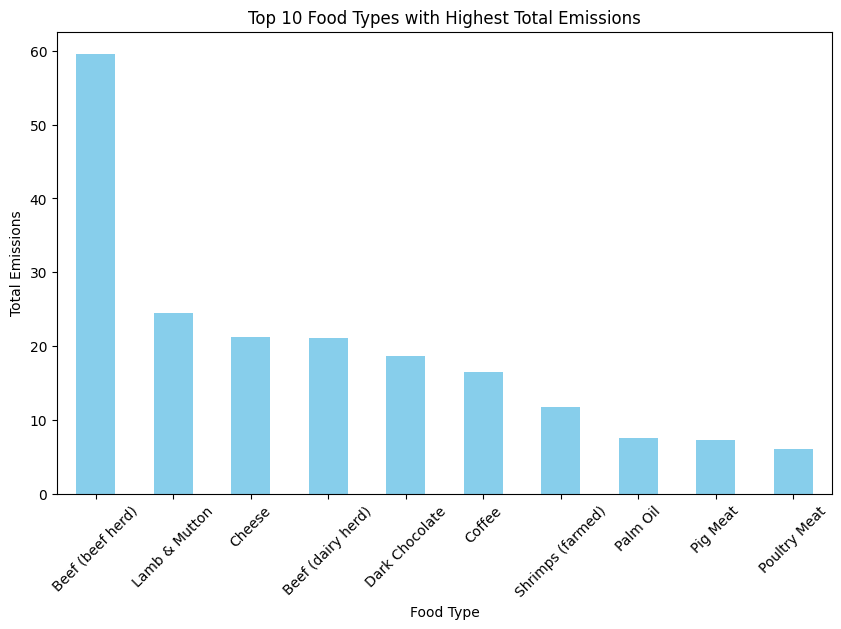

In [ ]:
# Plotting the top 10 most impactful food types
top_10_food_emissions = food_emissions_sorted.head(10)
top_10_food_emissions.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Food Types with Highest Total Emissions')
plt.xlabel('Food Type')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()

<ipython-input-54-2bfa182fa88f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_nutritional_values = nutritional_info_df.groupby('food product')['protein(g)', 'energy value(kcal)'].mean()


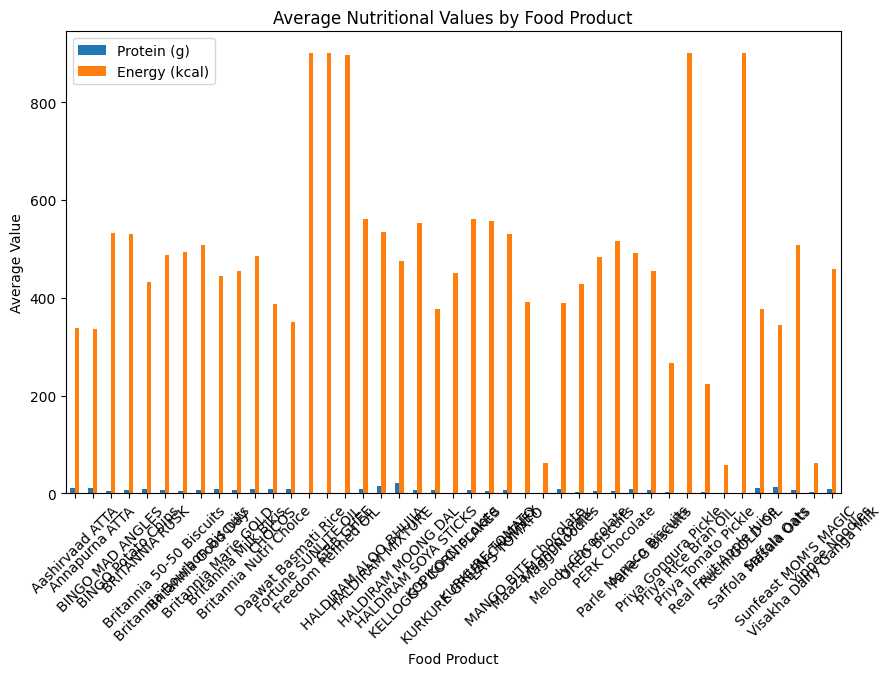

In [ ]:
# Calculate the average nutritional values for each food product
avg_nutritional_values = nutritional_info_df.groupby('food product')['protein(g)', 'energy value(kcal)'].mean()

# Plotting the average nutritional values
avg_nutritional_values.plot(kind='bar', figsize=(10, 6))
plt.title('Average Nutritional Values by Food Product')
plt.xlabel('Food Product')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(["Protein (g)", "Energy (kcal)"])
plt.show()

In [ ]:
print(food_production_df.columns)

Index(['food product', 'land use change', 'animal feed', 'farm', 'processing',
       'transport', 'packging', 'retail', 'total_emissions',
       'eutrophying emissions per 1000kcal (gpo₄eq per 1000kcal)',
       'eutrophying emissions per kilogram (gpo₄eq per kilogram)',
       'eutrophying emissions per 100g protein (gpo₄eq per 100 grams protein)',
       'freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'freshwater withdrawals per 100g protein (liters per 100g protein)',
       'freshwater withdrawals per kilogram (liters per kilogram)',
       'greenhouse gas emissions per 1000kcal (kgco₂eq per 1000kcal)',
       'greenhouse gas emissions per 100g protein (kgco₂eq per 100g protein)',
       'land use per 1000kcal (m² per 1000kcal)',
       'land use per kilogram (m² per kilogram)',
       'land use per 100g protein (m² per 100g protein)',
       'scarcity-weighted water use per kilogram (liters per kilogram)',
       'scarcity-weighted water use per 100g protein 

In [ ]:
print(nutritional_info_df.columns)

Index(['food product', 'energy value(kcal)', 'protein(g)', 'carbohydrate(g)',
       'total sugars(g)', 'added sugars(g)', 'total fat(g)',
       'saturated fat(g)', 'trans fat(g)', 'cholesterol(mg)', 'sodium(mg)',
       'energy_per_kg', 'Cluster'],
      dtype='object')


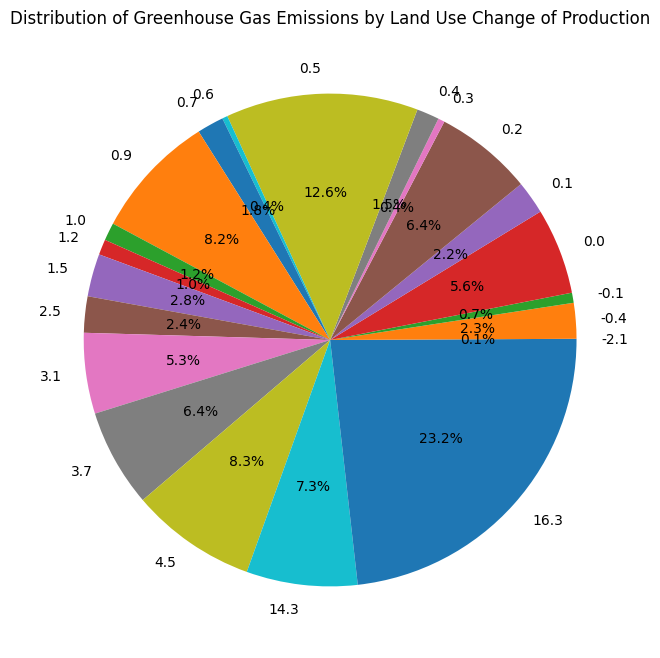

In [ ]:
# Grouping by land use change of production and summing up the emissions
land_use_emissions = food_production_df.groupby('land use change')['total_emissions'].sum()

# Plotting the emissions by land use change of production
land_use_emissions.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Greenhouse Gas Emissions by Land Use Change of Production')
plt.ylabel('')
plt.show()

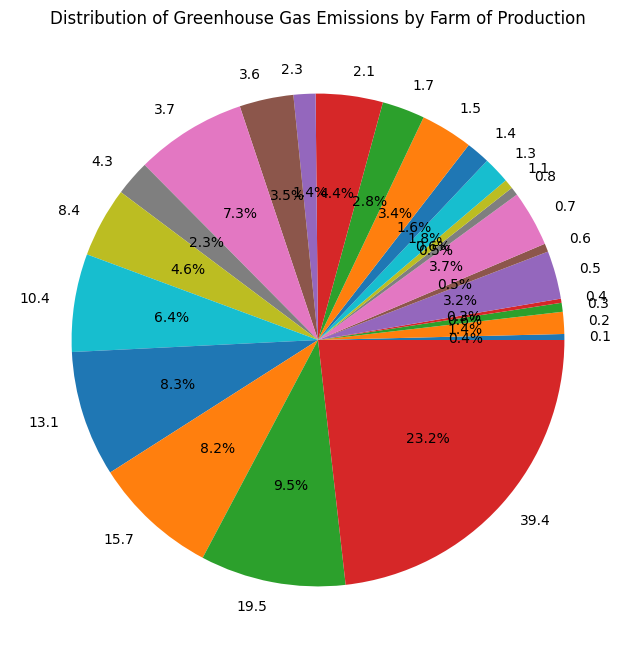

In [ ]:
# Grouping by farm of production and summing up the emissions
farm_emissions = food_production_df.groupby('farm')['total_emissions'].sum()

# Plotting the emissions by farm of production
farm_emissions.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Greenhouse Gas Emissions by Farm of Production')
plt.ylabel('')
plt.show()

In [ ]:
data = {
    'Food Product': ['Britannia 50-50 Biscuits', 'Parle Monaco Biscuits', 'Priya Gongura Pickle', 'Visakha Dairy Ganga Milk', 'HALDIRAM MOONG DAL', 'GRB GHEE'],
    'Total Emissions': [100, 200, 50, 80, 150, 300],
    'Food Type': ['Plant-based', 'Plant-based', 'Plant-based', 'Animal-based', 'Protein-rich', 'Animal-based']
}

df = pd.DataFrame(data)

avg_emissions = df.groupby('Food Type')['Total Emissions'].mean().sort_values()

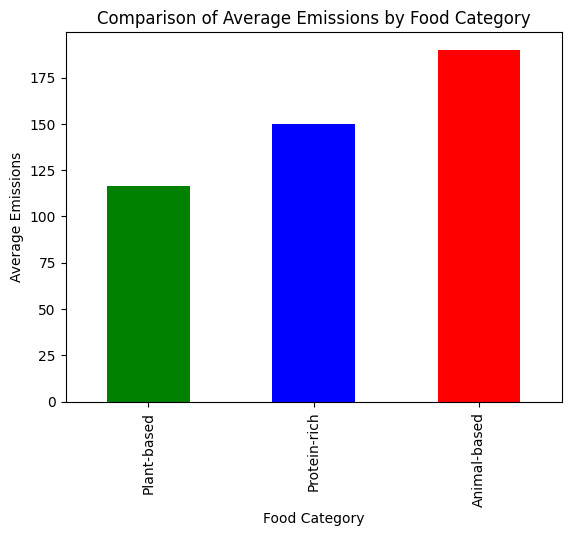

In [ ]:
# Plotting the comparison
avg_emissions.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Comparison of Average Emissions by Food Category')
plt.xlabel('Food Category')
plt.ylabel('Average Emissions')
plt.show()

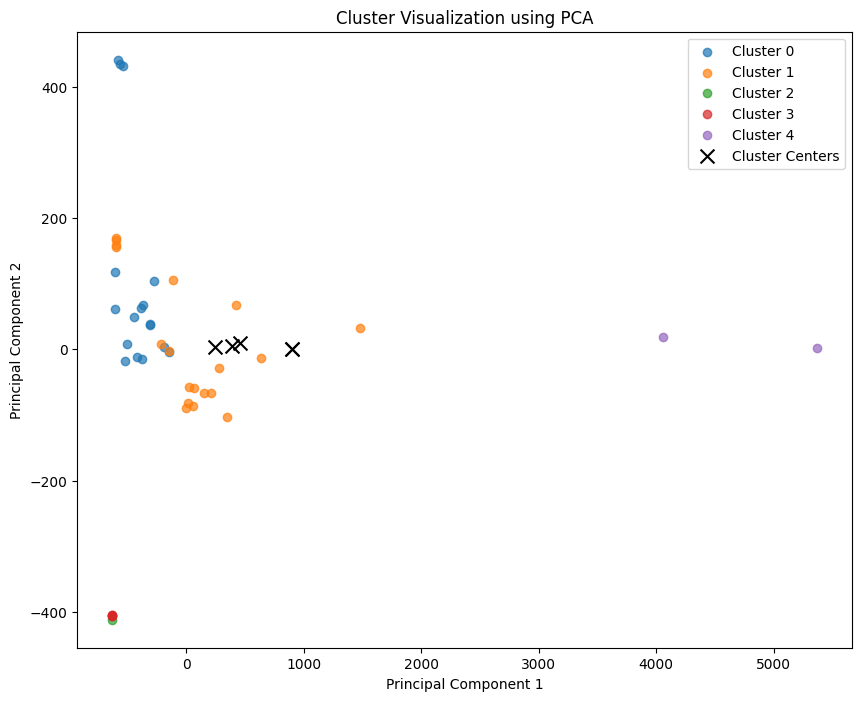

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(len(cluster_centers)):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}', alpha=0.7)

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

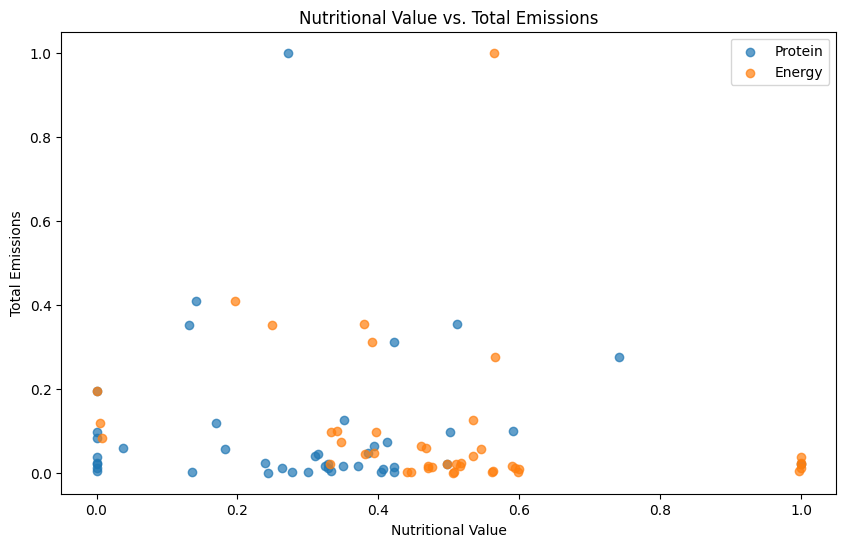

In [ ]:
# Plotting nutritional value vs. total emissions
plt.figure(figsize=(10, 6))
plt.scatter(nutritional_info_df_normalized['protein(g)'], food_production_df_normalized['total_emissions'], label='Protein', alpha=0.7)
plt.scatter(nutritional_info_df_normalized['energy value(kcal)'], food_production_df_normalized['total_emissions'], label='Energy', alpha=0.7)
plt.title('Nutritional Value vs. Total Emissions')
plt.xlabel('Nutritional Value')
plt.ylabel('Total Emissions')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

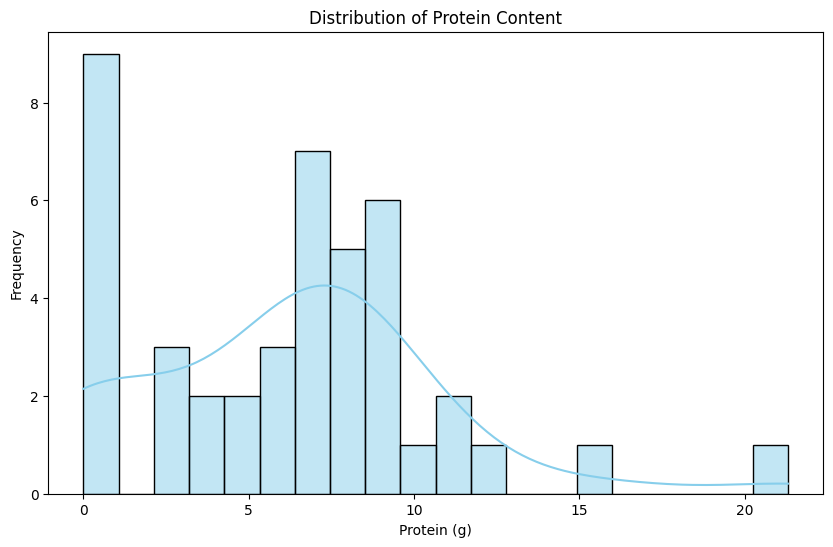

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(nutritional_info_df['protein(g)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Protein Content')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')
plt.show()

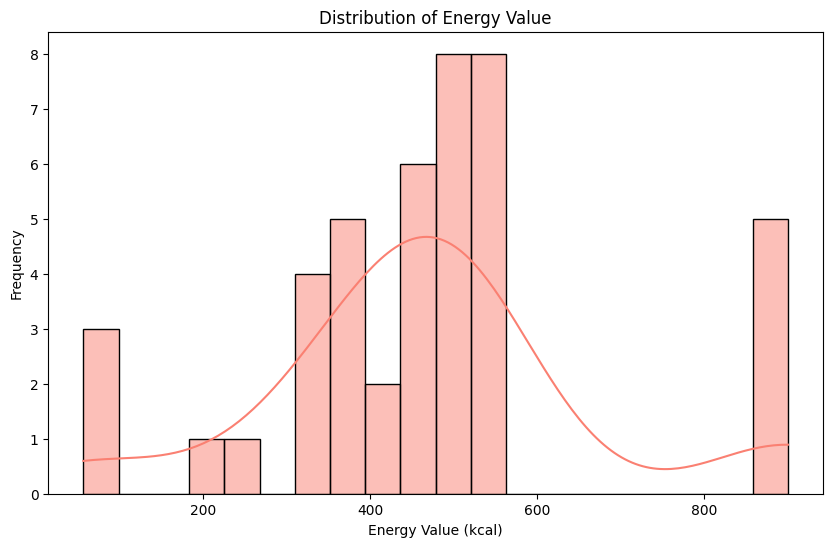

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(nutritional_info_df['energy value(kcal)'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Energy Value')
plt.xlabel('Energy Value (kcal)')
plt.ylabel('Frequency')
plt.show()

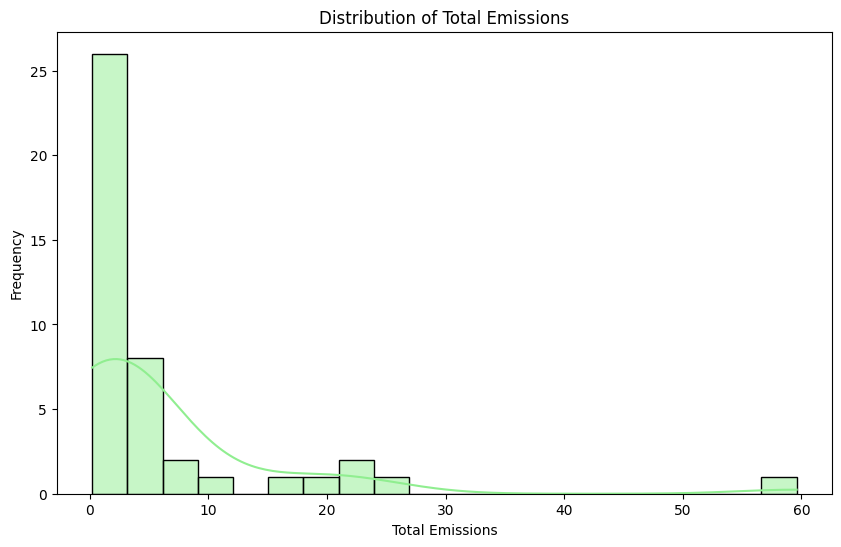

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(food_production_df['total_emissions'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Frequency')
plt.show()

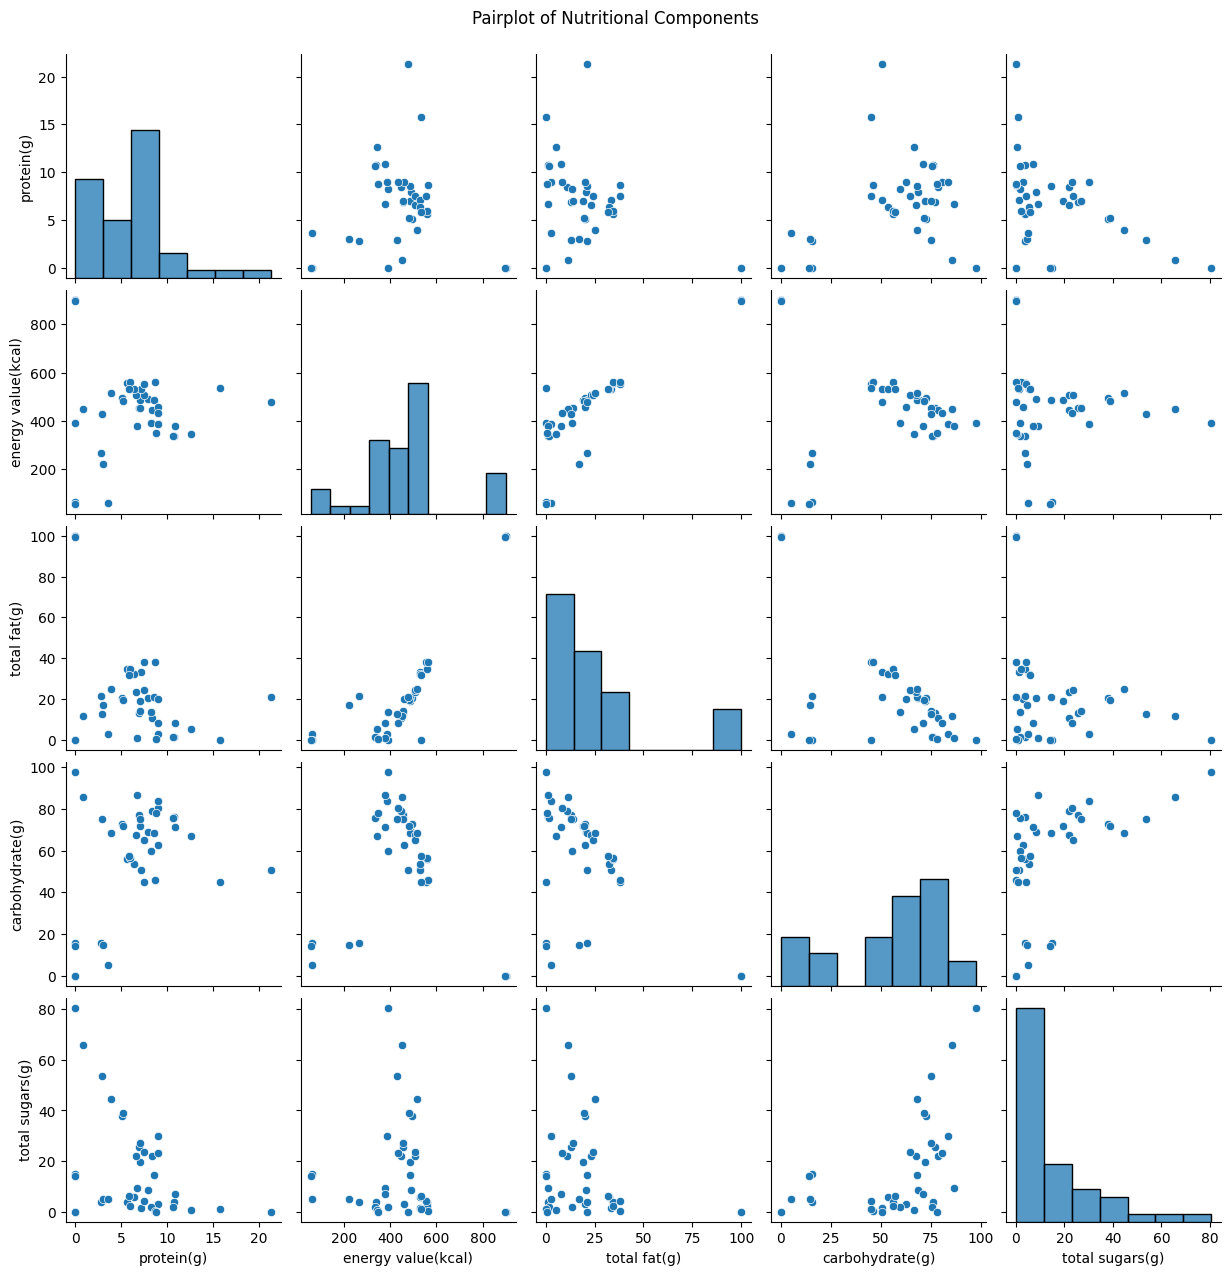

In [ ]:
# Selecting a subset of columns for pairplot
pairplot_columns = ['protein(g)', 'energy value(kcal)', 'total fat(g)', 'carbohydrate(g)', 'total sugars(g)']

# Creating a pairplot
sns.pairplot(nutritional_info_df[pairplot_columns])
plt.suptitle('Pairplot of Nutritional Components', y=1.02)
plt.show()

<ipython-input-71-285ce612c3e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(food_production_df.corr(), annot=True, cmap='coolwarm')


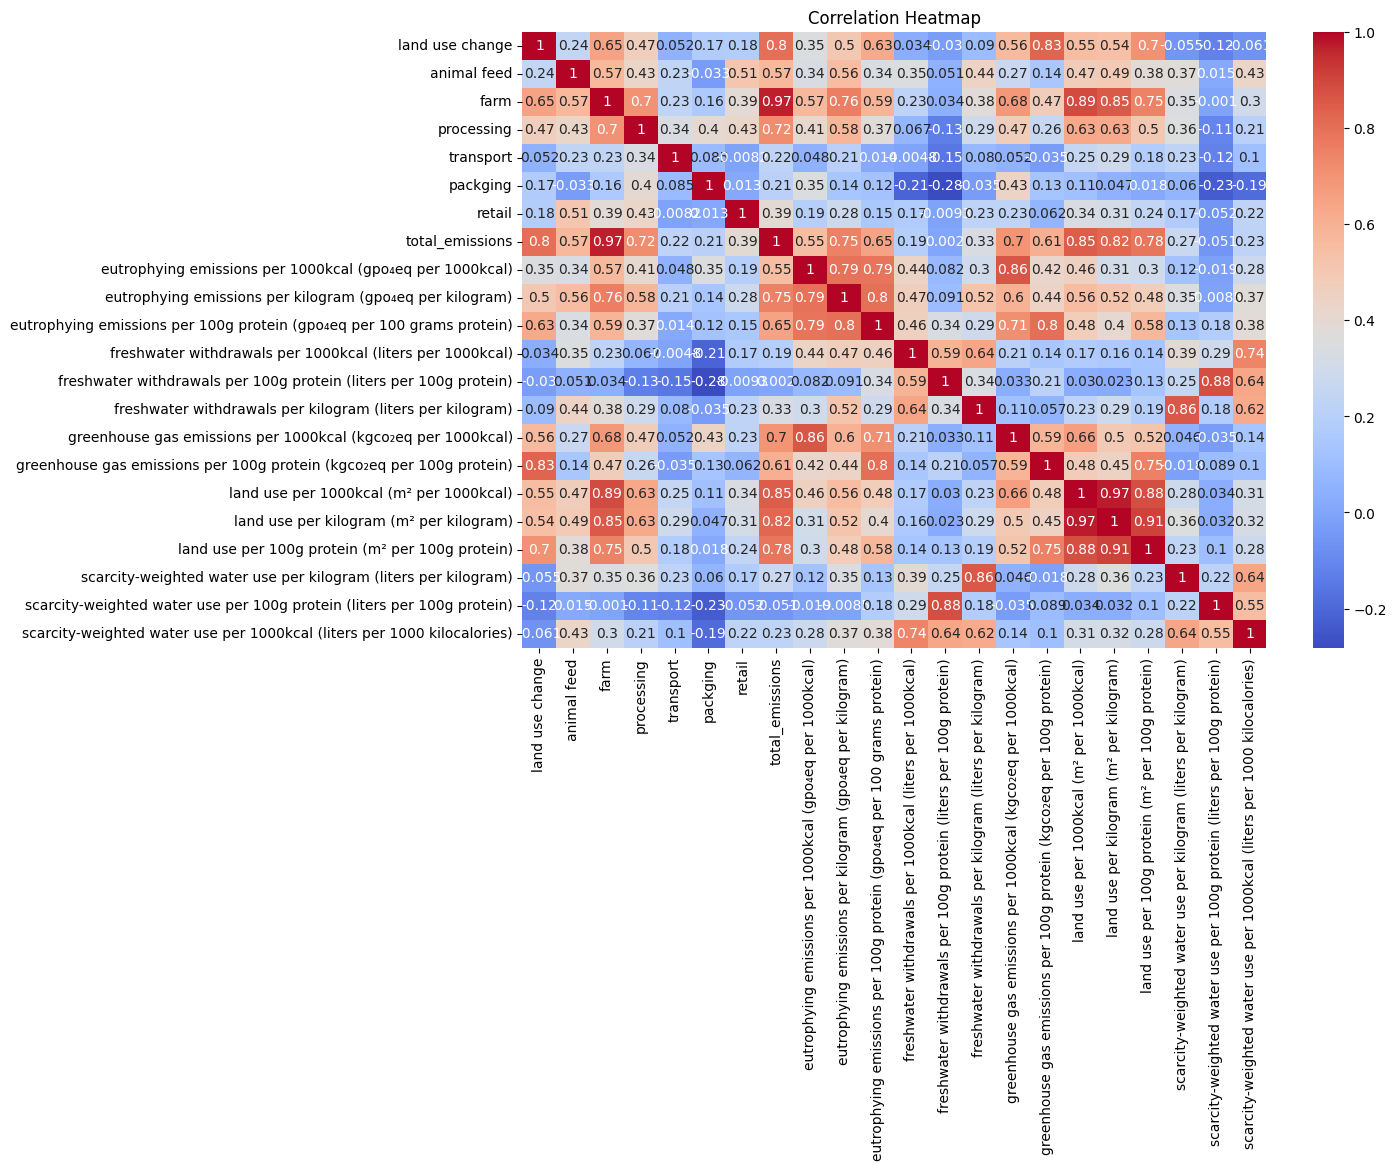

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(food_production_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-72-1c5b3f044081>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Food Type', y='Total Emissions', palette='pastel')


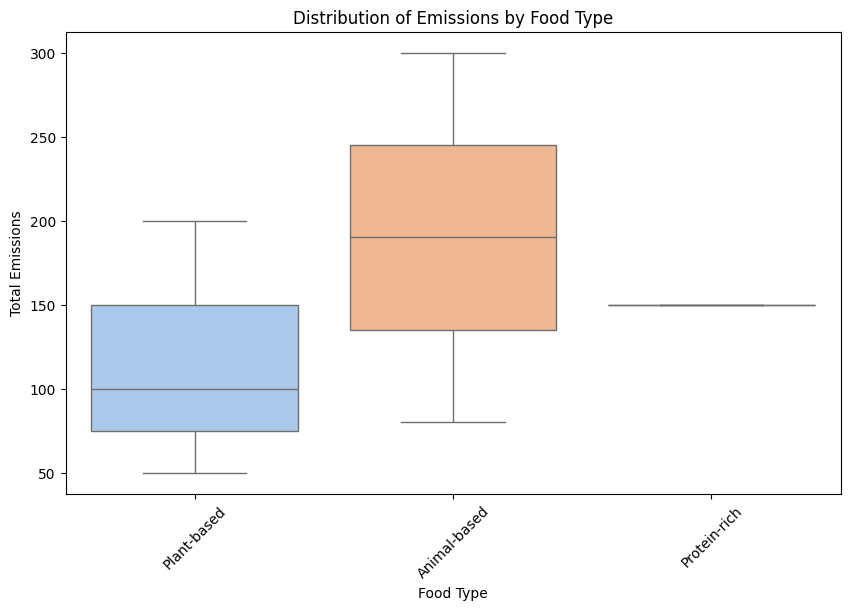

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Food Type', y='Total Emissions', palette='pastel')
plt.title('Distribution of Emissions by Food Type')
plt.xlabel('Food Type')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()

<ipython-input-73-ca3cd072a57d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nutritional_info_df, x='Cluster', y='protein(g)', palette='Set2')


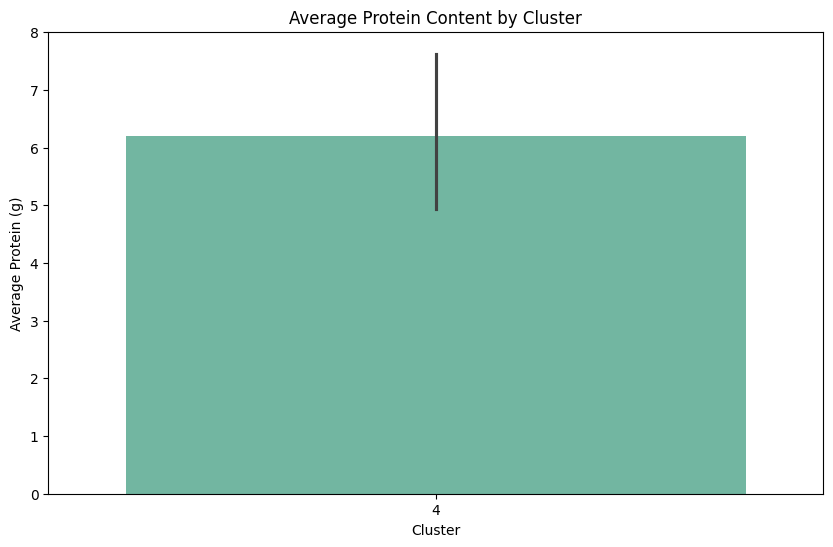

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=nutritional_info_df, x='Cluster', y='protein(g)', palette='Set2')
plt.title('Average Protein Content by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Protein (g)')
plt.show()

<ipython-input-74-88a7abaf267c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=nutritional_info_df, x='Cluster', y='protein(g)', palette='husl')


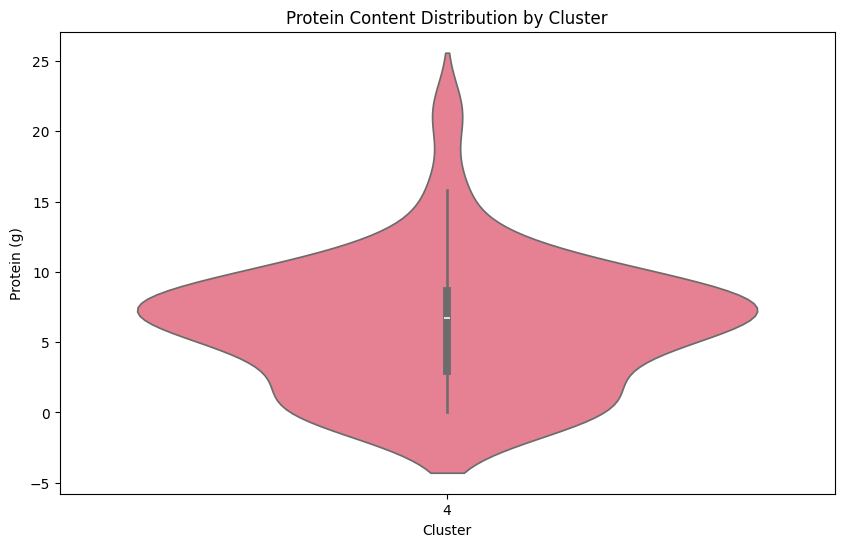

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=nutritional_info_df, x='Cluster', y='protein(g)', palette='husl')
plt.title('Protein Content Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Protein (g)')
plt.show()